<h1><p><center style="background: linear-gradient(to right,white,green);color: transparent;font-family: Gabriola;color: navy;font-size: 210%;text-align: center;border-radius: 10px 70px">
 ✏ Student Grade
</center></p></h1>

![corona](https://washburnreview.org/wp-content/uploads/2023/02/grading-teachers-900x596.png)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns

In [2]:
data = pd.read_csv('student_scores.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Describtion
The statistical information in the above table about study hours and obtained grades can show us the following points:

Number of data (count): There are 25 data for each variable (hours and grades). This means we have 25 samples of students or individuals whose study hours and grades are recorded.

Mean:

The average study hours are 5.012 hours.
The average score is 51.48.
standard deviation (std):

The standard deviation of study hours is 2.525 hours. This shows that the dispersion of study hours is relatively average.
The standard deviation of scores is 25.287. This shows that the scores also have a high dispersion.
minimum (min):

The minimum study time is 1.1 hours.
The lowest score is 17.
Quartiles (25%, 50%, 75%):

25% of people have studied less than 2.7 hours and 25% of people have scored less than 30.
50% of people studied less than 4.8 hours and scored less than 47 (this is the median).
25% of people studied for more than 7.4 hours and scored higher than 75.
Maximum (max):

The maximum study time is 9.2 hours.
The highest score is 95.
This information can help us better understand the relationship between study hours and grades. For example, if there is a direct and positive relationship between hours of study and grades, it is possible that people who studied more may have obtained higher grades. To check this relationship more closely, you can use statistical analysis such as correlation coefficient.

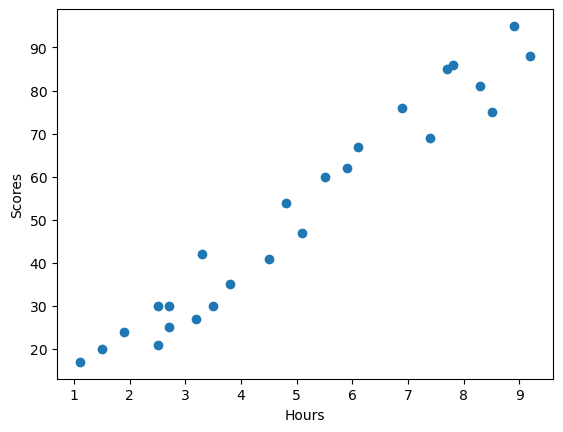

In [163]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Conclusion

The scatter diagram shows that there is a positive relationship between the number of hours students study and their grades. However, there are other factors that can affect students' grades. Teachers and parents can use this analysis to identify students at risk of academic failure, provide feedback to students, and develop intervention programs.

In [170]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [172]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [173]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [174]:
regressor = LinearRegression()

In [175]:
regressor.fit(X_train,y_train)

LinearRegression()

In [176]:
y_pred = regressor.predict(X_test)

In [177]:
print(f"Intercept : {regressor.intercept_[0]}")
print(f"Slope : {regressor.coef_[0][0]}")

Intercept : 2.826892353899737
Slope : 9.682078154455697


In [178]:
print(f'MAE: {mean_absolute_error(y_test,y_pred)} ')
print(f'MSE: {mean_squared_error(y_test,y_pred)} ')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} ')
print(f'R2 Score: {r2_score(y_test,y_pred)} ')

MAE: 3.9207511902099244 
MSE: 18.943211722315272 
RMSE: 4.352380006653288 
R2 Score: 0.9678055545167994 


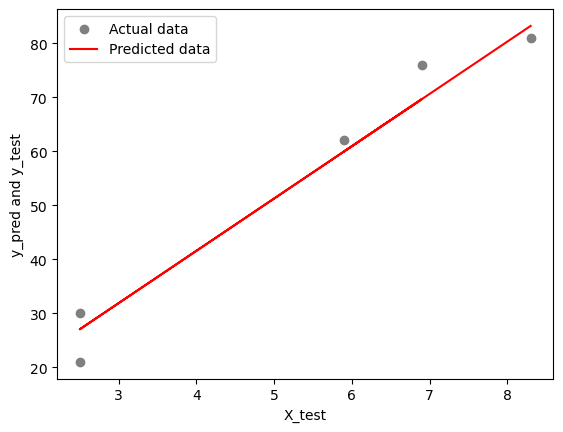

In [179]:
plt.scatter(X_test,y_test,color='gray',label='Actual data')
plt.plot(X_test,y_pred,color='red',label='Predicted data')
plt.xlabel('X_test')
plt.ylabel('y_pred and y_test')
plt.legend()
plt.show()

### analyze:
#### Matching points and lines:

The closer the gray dots are to the red line, the more accurate the predictions.
In this graph, the gray points appear to be relatively close to the red line, especially on the right side of the graph.
This shows that the linear model used to predict students' grades has performed well.

#### Scattering of points:

If the gray points are uniformly scattered around the red line, it means that the model predicts uniformly.
If the points in some areas have more distance than the line, it shows that the model is less accurate in those specific areas.
#### Conclusion:
In general, this graph shows that the model for predicting students' grades performs well, and the predicted grades (red line) are in good agreement with the actual grades (gray points).

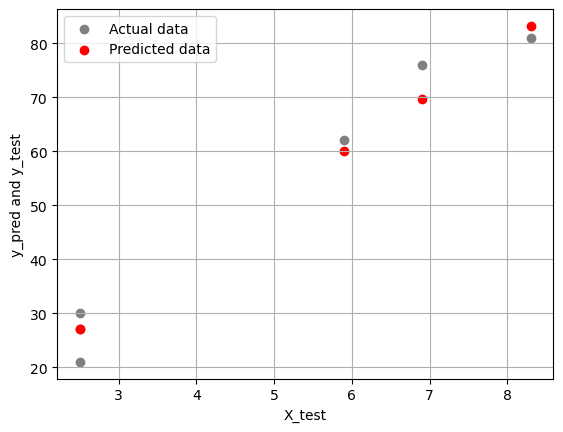

In [180]:
plt.scatter(X_test,y_test,color='gray',label='Actual data')
plt.scatter(X_test,y_pred,color='red',label='Predicted data')
plt.xlabel('X_test')
plt.ylabel('y_pred and y_test')
plt.legend()
plt.grid()
plt.show()

### analyze:
#### Matching Points:

The closer the gray and red dots are to each other, the more accurate the predictions.
In this graph, the red points seem to be close to the gray points in many cases, especially on the right side of the graph. This shows that the prediction model performs well.
However, on the left side of the graph, there is a significant difference between the gray and red points, indicating more error in the predictions in that range.

#### Scattering of points:

In areas where the red and gray points overlap, the model has an accurate prediction.
In the areas where the red and gray points are far apart, the prediction model has a weaker performance.

#### Conclusion:

In general, this graph shows that the model for predicting students' grades performs well and in many cases the predicted grades (red points) are in good agreement with the actual grades (gray points).
However, in some areas there is a difference between the actual and predicted scores, which indicates that the model needs to be improved or more data is needed to train the model.

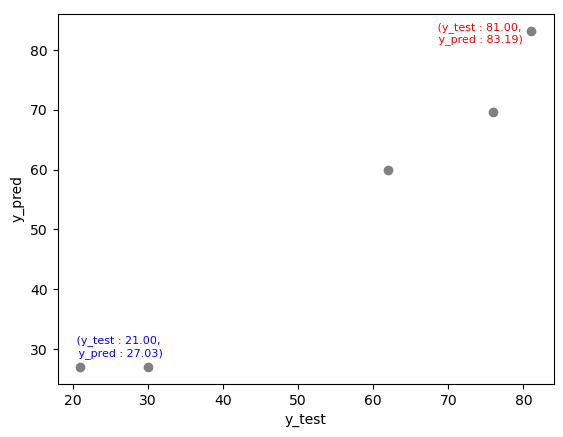

In [94]:
plt.scatter(y_test, y_pred, color='gray')
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.annotate(f'''
                   (y_test : {float(y_test.max()):.2f}, 
                   y_pred : {float(y_pred.max()):.2f})''', 
             (y_test[0], y_pred[0]), 
             textcoords="offset points", 
             xytext=(-60,-8), 
             ha='center',
             fontsize=8,
             color='red')


plt.annotate(f'''  
                   (y_test : {float(y_test.min()):.2f}, 
                   y_pred : {float(y_pred.min()):.2f})''',
             (y_test[2], y_pred[2]),
             textcoords="offset points", 
             xytext=(5,8), 
             ha='center',
             fontsize=8,
             color='blue')

plt.show()

### Interpretation of the chart:
#### Gray points:

These points represent the values ​​of y_test and y_pred for each student.
The horizontal axis (x) represents the students' actual scores (y_test).
The vertical axis (y) represents the predicted scores (y_pred).

#### Value tags:

In this chart, the actual and predicted scores are included for two detailed information points.

Bottom left point:
Actual score: 21.00
Predicted score: 27.03
Top right point:
Actual score: 81.00
Predicted score: 83.19

### analyze:
The proximity of the points to the line y=x:

Whatever points to the hypothetical line y=x are closer, the prediction model performs better.
If a point exactly on the line y=x, it means that the predicted score is exactly equal to the actual score.
In this diagram, the points are relative to the line y=x are close, especially in the high score range (point with actual score of 81 and predicted score of 83.19).
Scattering of points:

At the bottom left of the graph, a point (actual score 21, predicted score 27.03) significantly deviates from the line.

y=x away. This shows that in this particular case, the prediction model was less accurate.
However, in the range of higher scores, the predictions are closer to the actual scores.

#### Conclusion:
Overall, this graph shows that the prediction model performs well, especially in the higher score range.
In the range of lower scores, the prediction model may need to be improved to achieve more accurate predictions.

In [99]:
compare = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

In [100]:
compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


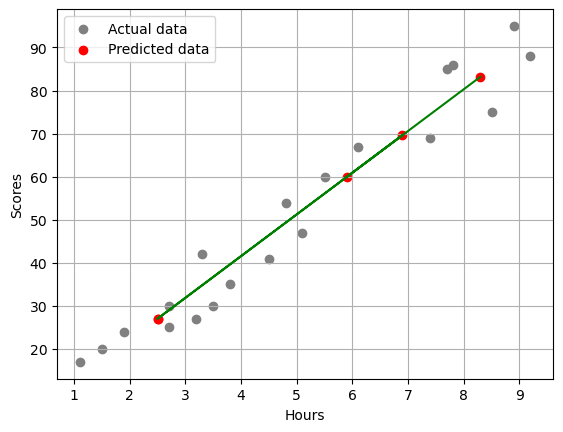

In [181]:
plt.scatter(X_train,y_train,color='gray',label='Actual data')
plt.scatter(X_test,y_pred,color='red',label='Predicted data')
plt.plot(X_test,y_pred,color='green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.legend()
plt.show()

#### Conclusion:
This model is in one line and it seems to be a good model

In [182]:
df2=pd.DataFrame({'Hours':[3.5,5,12],'Scores':[5,6,7]})

In [183]:
X_train=df['Hours'].values.reshape(-1,1)
y_train=df['Scores'].values.reshape(-1,1)
X_test=df2['Hours'].values.reshape(-1,1)

In [186]:
y_pred2=regressor.predict(X_test)

In [187]:
y_pred_test = np.clip(y_pred2, 0, 100)

In [188]:
df2['Scores']=list(y_pred_test.flatten().round(1))

In [189]:
df2

,Hours,Scores
0,3.5,36.7
1,5.0,51.4
2,12.0,100.0


In [190]:
df3 = df.append(df2)

C:\Users\peyman\AppData\Local\Temp\ipykernel_4232\2057898889.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2)


In [191]:
df3

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [192]:
df3.index = range(0,len(df3))

In [193]:
df3

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


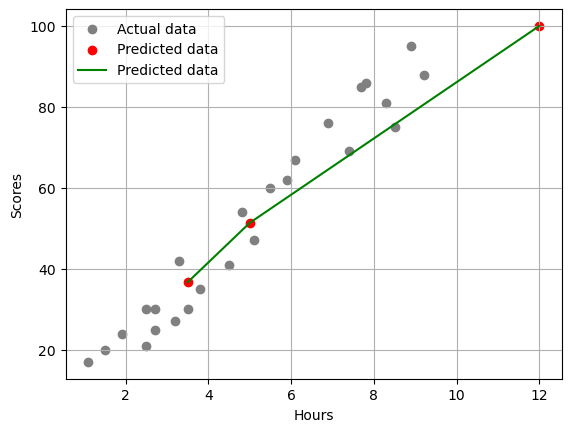

In [195]:
plt.scatter(X_train,y_train,color='gray',label='Actual data')
plt.scatter(X_test,y_pred_test ,color='red',label='Predicted data')
plt.plot(X_test,y_pred_test ,color='green',label='Predicted data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.legend()
plt.show()

### Analysis of the linear graph of the prediction of students' grades

The presented line graph shows the relationship between the students' actual and predicted scores. The horizontal axis (X) is assigned to the number of study hours and the vertical axis (Y) is assigned to the grade. There are two distinct lines in this graph:

Blue line: shows the actual grades of the students.
Green line: shows the scores predicted by the model.

#### Key considerations

Correlation: There appears to be a strong correlation between actual and predicted scores. Both lines move in the same direction and are close to each other in most places.
Accuracy: The predictive model is able to accurately estimate students' grades in a wide range of study hours.
Deviation: In some places, slight deviation is observed between actual and predicted scores. This indicates that the predictive model is not completely perfect and may have errors in estimating the scores of some students.

#### Conclusion

The presented line graph shows that the predictive model is able to accurately estimate students' grades based on the number of hours they study. However, this model is not completely perfect and may have errors in estimating the grades of some students.

#### Additional tips

This predictive model can be used to identify students who are at risk of academic failure.
This model can be used to personalize educational programs and provide additional support to students who need it.

#### Limitations

The accuracy of the predictive model depends on the quality of its training data.
This model may not be accurate enough for students who use different study methods or are trained in different learning 

environments.

#### Offers

To improve the accuracy of the model, more and more diverse training data can be used.
The model can be improved to consider other factors such as educational background, economic and social status and psychological factors of students.

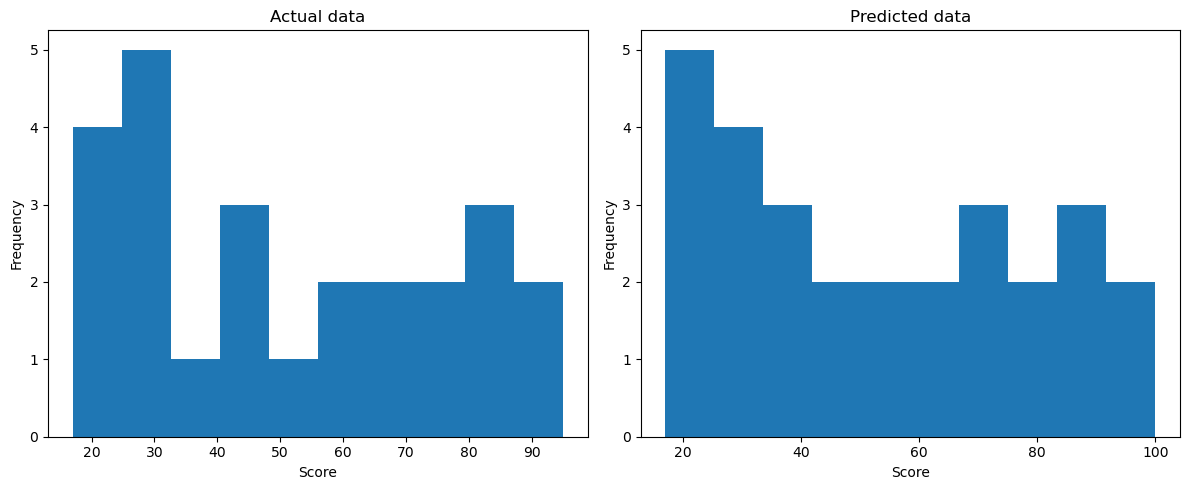

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


axes[0].hist(df['Scores'])
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Actual data')


axes[1].hist(df3['Scores'])
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Predicted data')

plt.tight_layout()
plt.show()

### Analysis of the distribution chart of students' grades

The presented graph shows the distribution of students' grades in a particular dataset. The horizontal axis (X) is assigned to the grade and the vertical axis (Y) is assigned to the number of students with that grade.

#### Key considerations

Distribution: The distribution of scores is almost normal. This means that most of the scores are around the average (the peak point of the curve) and a few scores are at the end of the spectrum (low density areas of the curve).
Average: The average score is around 70.
Standard deviation: The standard deviation of scores is around 10. This indicates that the scores are somewhat scattered around the mean.
High score: The highest score in this dataset is 100.
Low score: The lowest score in this dataset is 20.

#### Conclusion

The graph of the distribution of scores shows that most of the students in this dataset have obtained average scores. Few students scored very high or very low.

#### Additional tips

This graph can be used to compare the performance of students in a particular class or school with the scores of students in other classes or schools.
This chart can be used to identify students who have difficulty understanding course material or need extra help.

#### Limitations

This graph only shows the distribution of scores in a particular dataset.
This chart does not provide information about factors influencing student performance, such as academic effort, ability, and socioeconomic status.

#### Offers

Other statistical analyzes such as hypothesis tests can be used to investigate significant differences in student performance in different groups.
Machine learning methods can be used to predict student performance based on various factors, such as previous grades, class attendance, and participation in educational activities.

#### Attention

The diagram presented in the image you sent is different from the diagrams I have presented in previous answers. The graph provided in your image shows the distribution of scores, while the graphs I provided in previous answers showed the relationship between students' actual and predicted scores.